In [1]:
from matplotlib import pyplot as plt
import pandas
import seaborn as sns

%matplotlib inline

FIG_WIDTH=20
FIG_HEIGTH=8


# Debian Xorg + GNOME tests
Those tests were run in my regular workstation, using GNOME + Xorg

|                |   count |    mean |      std |   min |     25% |    50% |     75% |   max |
|:---------------|--------:|--------:|---------:|------:|--------:|-------:|--------:|------:|
| mlterm         |     200 | 28.8349 | 6.23246  | 15.16 | 31.235  | 31.665 | 32.0425 | 32.65 |
| uxterm         |     200 | 29.8086 | 5.01335  | 15.39 | 31.25   | 31.525 | 31.9025 | 32.5  |
| konsole        |     199 | 31.7569 | 1.20074  | 16.22 | 31.52   | 31.8   | 32.12   | 35.07 |
| alacritty      |     200 | 31.7943 | 0.560434 | 27.24 | 31.45   | 31.82  | 32.1625 | 33.11 |
| st             |     200 | 33.5791 | 5.03363  | 30.66 | 31.64   | 31.975 | 32.3225 | 49.33 |
| urxvt          |     200 | 47.4618 | 4.18906  | 31.81 | 48.245  | 48.58  | 49.0025 | 49.7  |
| pterm          |     200 | 48.2193 | 2.63108  | 31.24 | 48.23   | 48.595 | 48.96   | 49.76 |
| gnome-terminal |     200 | 48.303  | 2.40031  | 32.18 | 48.2675 | 48.635 | 48.9525 | 55.12 |
| xfce4-terminal |     200 | 48.3829 | 2.00524  | 

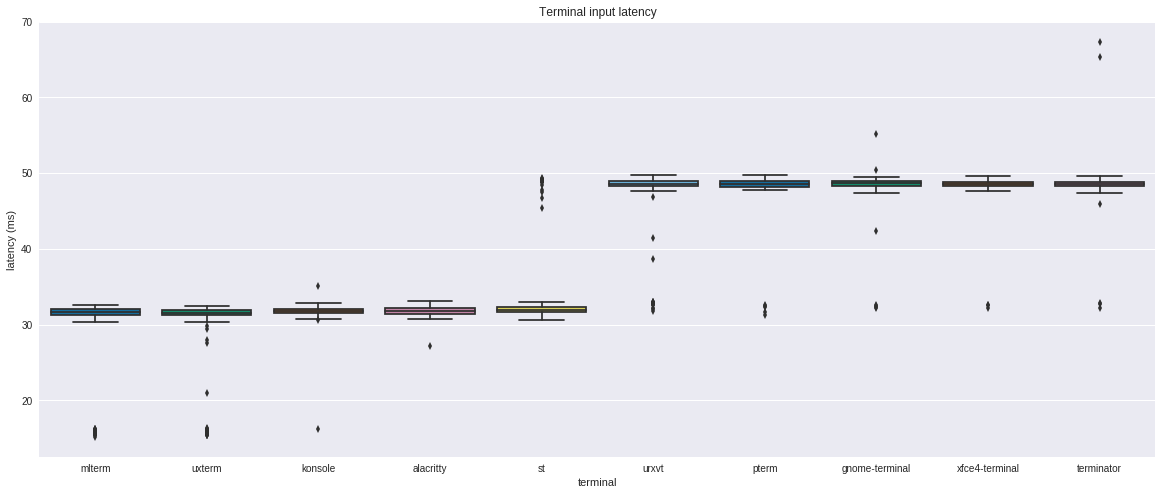

In [37]:
fig, _ = plt.subplots()
fig.set_figwidth(FIG_WIDTH)
fig.set_figheight(FIG_HEIGTH)

latency = pandas.read_csv('latency/debian9-xorg.csv')
# remove weird outlier in konsole
latency = latency.apply(lambda x: x[(x<100)], axis=0)
latency = latency.reindex_axis(latency.mean().sort_values().index, axis=1)

ax = sns.boxplot(data=latency, palette='colorblind')
ax.set_title('Terminal input latency')
ax.set_xlabel('terminal')
ax.set_ylabel('latency (ms)')

from tabulate import tabulate
print(tabulate(latency.describe().transpose(), headers='keys', tablefmt='pipe'))


# Debian Xorg + i3
Those were run using a simpler session using the i3 window manager.

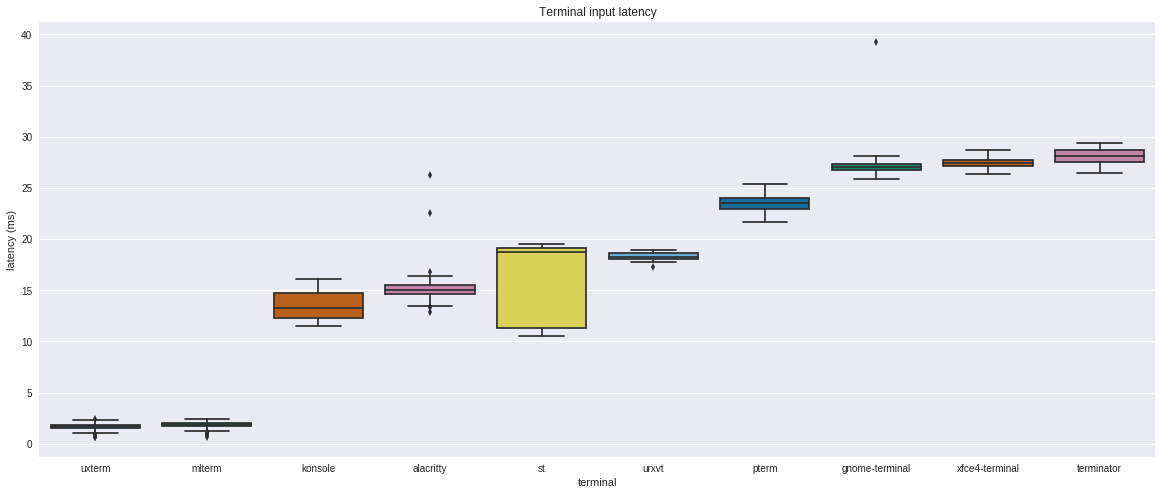

In [31]:
fig, _ = plt.subplots()
fig.set_figwidth(FIG_WIDTH)
fig.set_figheight(FIG_HEIGTH)

latency = pandas.read_csv('latency/debian9-xorg-i3.csv')
latency.drop(["urxvt-xft-monospace", "urxvt-fixed-16", "urxvt-fixed-16-float"], axis=1, inplace=True)

latency = latency.reindex_axis(latency.mean().sort_values().index, axis=1)

ax = sns.boxplot(data=latency, palette='colorblind')
ax.set_title('Terminal input latency')
ax.set_xlabel('terminal')
ax.set_ylabel('latency (ms)')


|                |   count |    mean |      std |   min |     25% |    50% |     75% |   max |
|:---------------|--------:|--------:|---------:|------:|--------:|-------:|--------:|------:|
| uxterm         |     200 |  1.6574 | 0.31926  |  0.66 |  1.5275 |  1.705 |  1.8725 |  2.41 |
| mlterm         |     200 |  1.829  | 0.318175 |  0.68 |  1.7    |  1.875 |  2.0325 |  2.47 |
| vim.athena     |     200 |  2.8003 | 1.14432  |  0.37 |  2.3875 |  2.87  |  3.2325 | 12.67 |
| vim.gtk        |     200 |  3.8875 | 1.23953  |  0.67 |  3.625  |  4.23  |  4.53   | 11.9  |
| emacs -q       |     200 |  4.8069 | 2.31823  |  0.5  |  4.2275 |  4.91  |  5.2625 | 32.52 |
| gedit          |     200 |  8.904  | 3.36579  |  2.83 |  6.2325 |  9.835 | 11.9825 | 14.22 |
| konsole        |     200 | 13.4329 | 1.21424  | 11.5  | 12.31   | 13.27  | 14.745  | 16.06 |
| alacritty      |     200 | 15.1351 | 1.16103  | 12.84 | 14.645  | 15.07  | 15.4825 | 26.29 |
| st             |     200 | 15.7485 | 3.93891  | 

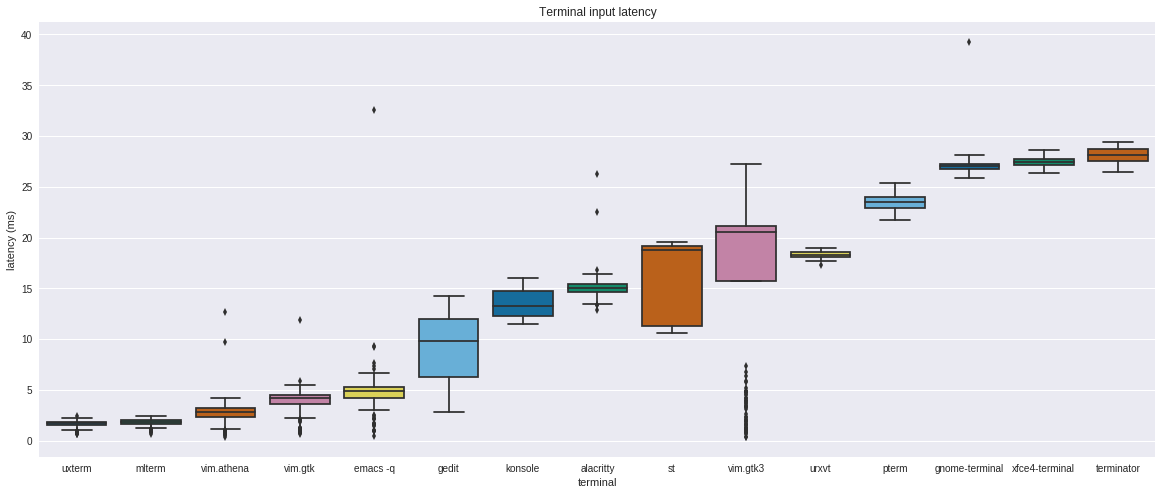

In [32]:
latency = pandas.concat([latency, pandas.read_csv('editors.csv')])

latency.drop("emacs", axis=1, inplace=True)
latency = latency.reindex_axis(latency.mean().sort_values().index, axis=1)

from tabulate import tabulate
print(tabulate(latency.describe().transpose(), headers='keys', tablefmt='pipe'))

fig, _ = plt.subplots()
fig.set_figwidth(FIG_WIDTH)
fig.set_figheight(FIG_HEIGTH)

ax = sns.boxplot(data=latency, palette='colorblind')
ax.set_title('Terminal input latency')
ax.set_xlabel('terminal')
ax.set_ylabel('latency (ms)')


# Fedora GNOME + Xorg
Those tests were ran on Fedora 27 with the default GNOME + Xorg session. The tests crash completely in Wayland.

|                |   count |    mean |     std |   min |     25% |    50% |     75% |   max |
|:---------------|--------:|--------:|--------:|------:|--------:|-------:|--------:|------:|
| mlterm         |     200 | 16.732  | 6.52684 |  8.2  | 12.66   | 13.36  | 17.6    | 30.9  |
| uxterm         |     200 | 28.9527 | 3.73927 | 11.93 | 28.3675 | 29.49  | 30.63   | 37.59 |
| konsole        |     200 | 29.8188 | 2.14301 | 21.95 | 28.5575 | 29.75  | 30.725  | 41.72 |
| st             |     200 | 30.4384 | 3.81713 | 21.99 | 28.345  | 29.875 | 31.7525 | 46.11 |
| pterm          |     200 | 42.1507 | 5.62529 | 29.58 | 34.2225 | 44.835 | 46.08   | 48.09 |
| urxvt          |     200 | 43.8995 | 4.9363  | 29.68 | 44.205  | 45.59  | 46.7625 | 50.7  |
| terminology    |     200 | 44.3843 | 4.80309 | 29.76 | 44.6625 | 46     | 46.8125 | 57.95 |
| gnome-terminal |     200 | 45.9754 | 1.94185 | 35.14 | 45.505  | 46.345 | 46.8225 | 53.88 |
| xfce4-terminal |     200 | 46.1249 | 1.85098 | 35.16 | 45.

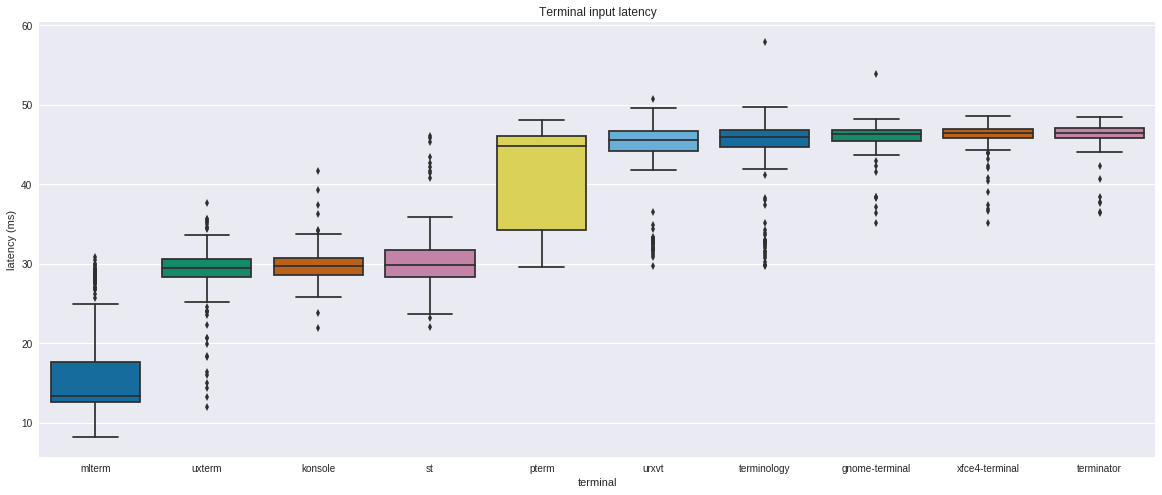

In [33]:
fig, _ = plt.subplots()
fig.set_figwidth(FIG_WIDTH)
fig.set_figheight(FIG_HEIGTH)

latency = pandas.read_csv('latency/fedora27-xorg.csv')
latency = latency.reindex_axis(latency.mean().sort_values().index, axis=1)

ax = sns.boxplot(data=latency, palette='colorblind')
ax.set_title('Terminal input latency')
ax.set_xlabel('terminal')
ax.set_ylabel('latency (ms)')

print(tabulate(latency.describe().transpose(), headers='keys', tablefmt='pipe'))


# Processing time (wall time)

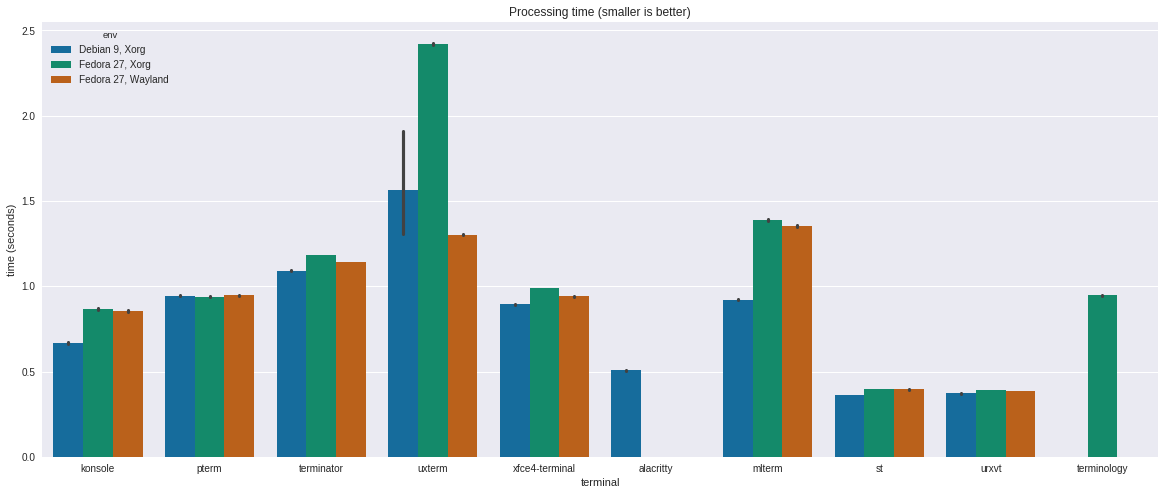

In [21]:
deb9_xorg = pandas.read_csv('debian9-xorg-prime-100x100000.csv').assign(env='Debian 9, Xorg')
f27_xorg = pandas.read_csv('fedora27-xorg-prime-100x100000.csv').assign(env='Fedora 27, Xorg')
f27_wayland = pandas.read_csv('fedora27-wayland-prime-100x100000.csv').assign(env='Fedora 27, Wayland')

fig, _ = plt.subplots()
fig.set_figwidth(FIG_WIDTH)
fig.set_figheight(FIG_HEIGTH)

data = pandas.concat([deb9_xorg, f27_xorg, f27_wayland])
data['terminal'].replace(['stterm'], 'st',inplace=True)

ax = sns.barplot(data=data, x='terminal', y='wtime', palette='colorblind', hue='env')
ax.set_title('Processing time (smaller is better)')
ax.set_ylabel('time (seconds)')

# system time

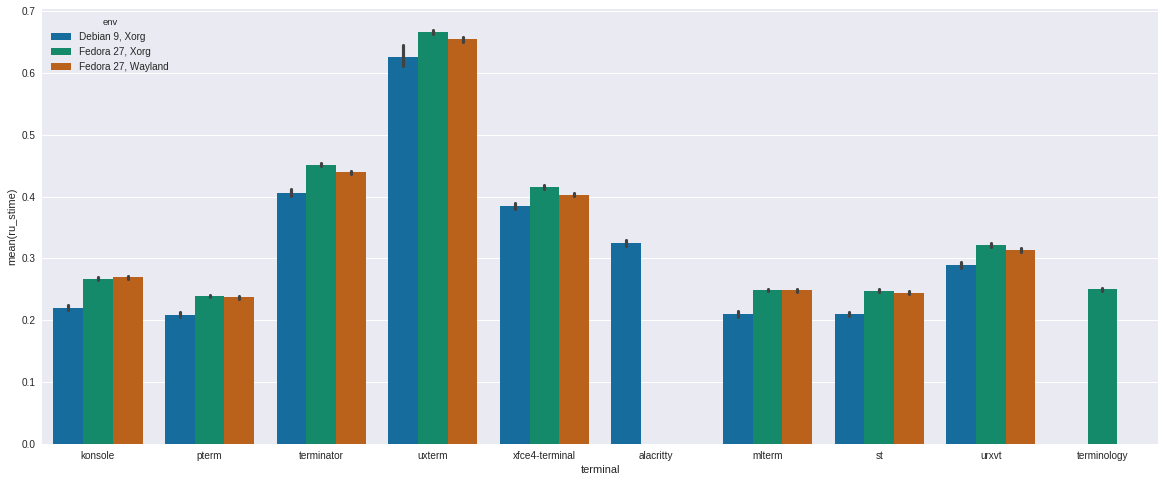

In [7]:
fig, _ = plt.subplots()
fig.set_figwidth(FIG_WIDTH)
fig.set_figheight(FIG_HEIGTH)

ax = sns.barplot(data=data, x='terminal', y='ru_stime', palette='colorblind', hue='env')

# user time

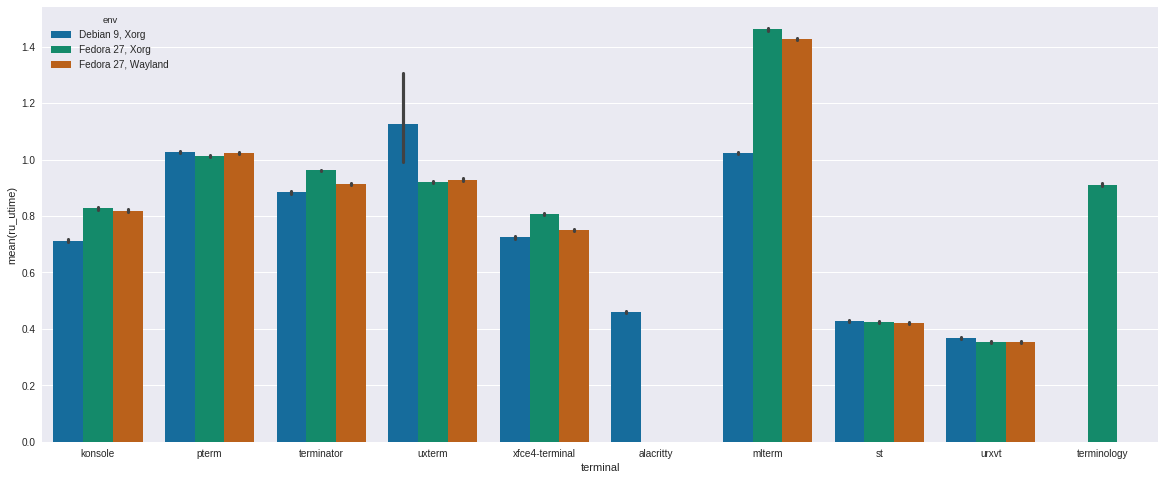

In [8]:
fig, _ = plt.subplots()
fig.set_figwidth(FIG_WIDTH)
fig.set_figheight(FIG_HEIGTH)

ax = sns.barplot(data=data, x='terminal', y='ru_utime', palette='colorblind', hue='env')

# Memory usage

|                             |        n |   ru_idrss |   ru_inblock |   ru_isrss |   ru_ixrss |   ru_majflt |   ru_maxrss |   ru_minflt |   ru_msgrcv |   ru_msgsnd |   ru_nivcsw |   ru_nsignals |   ru_nswap |    ru_nvcsw |   ru_oublock |    ru_stime |    ru_utime |       wtime |
|:----------------------------|---------:|-----------:|-------------:|-----------:|-----------:|------------:|------------:|------------:|------------:|------------:|------------:|--------------:|-----------:|------------:|-------------:|------------:|------------:|------------:|
| ('alacritty', 'count')      | 100      |        100 |          100 |        100 |        100 |         100 |     100     |   100       |         100 |         100 |     100     |           100 |        100 |   100       |  100         | 100         | 100         | 100         |
| ('alacritty', 'mean')       | 549.5    |          0 |            0 |          0 |          0 |           0 |   29032.9   |  5154.32    |           0 |     

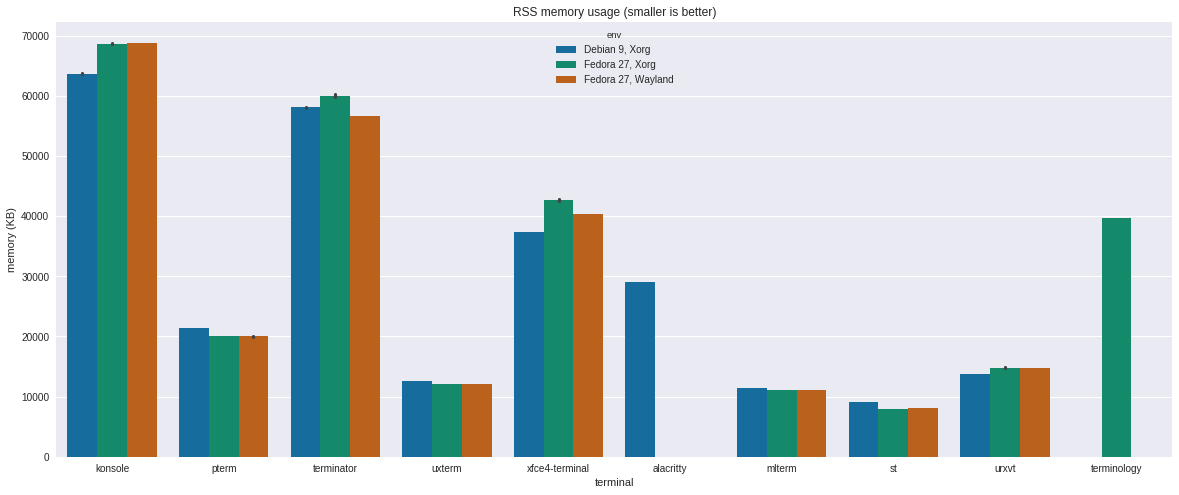

In [55]:
fig, _ = plt.subplots()
fig.set_figwidth(FIG_WIDTH)
fig.set_figheight(FIG_HEIGTH)

ax = sns.barplot(data=data, x='terminal', y='ru_maxrss', palette='colorblind', hue='env')
ax.set_title('RSS memory usage (smaller is better)')
ax.set_ylabel('memory (KB)')
from tabulate import tabulate

#print(tabulate(latency.describe().transpose(), headers='keys', tablefmt='pipe'))
#print(tabulate(data.groupby('terminal').describe(), headers='keys', tablefmt='pipe'))

# I/O usage

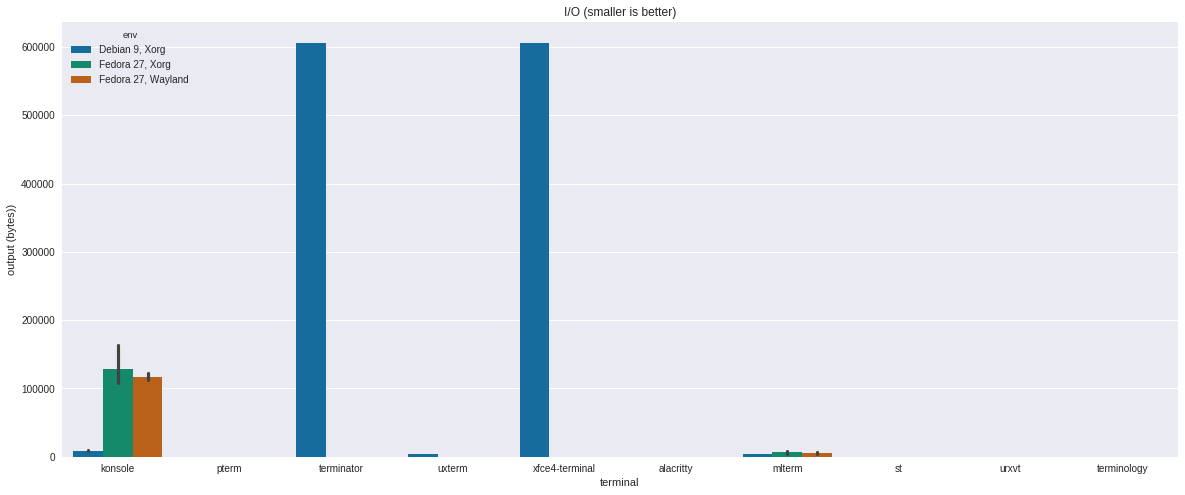

In [10]:
data['blocks'] = data['ru_inblock'] + data['ru_oublock']

# https://lkml.org/lkml/2007/3/19/84
# "block size" is apparently hardcoded to 512 bytes
data['out_bytes'] = data['ru_oublock'] * 512
fig, _ = plt.subplots()
fig.set_figwidth(FIG_WIDTH)
fig.set_figheight(FIG_HEIGTH)

ax = sns.barplot(data=data, x='terminal', y='out_bytes', palette='colorblind', hue='env')
ax.set_title('I/O (smaller is better)')
ax.set_ylabel('output (bytes))')
